<a href="https://colab.research.google.com/github/saramony/Assignment-3/blob/master/MSDS_422_Assignment_6_Aramony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#imports pandas
import pandas as pd

#Defines the URL for Github
url= 'https://raw.githubusercontent.com/saramony/Assignment-5/master/test.csv'
url2= 'https://raw.githubusercontent.com/saramony/Assignment-5/master/train.csv'

# Dataset is now stored in a Pandas Dataframe
TrainSet = pd.read_csv(url2)
TestSet = pd.read_csv(url)

#Defines the shape of the data
print("The dataset has Train", len(TrainSet), "rows and", TrainSet.shape[1], "columns")
print("The dataset has Test", len(TrainSet), "rows and", TestSet.shape[1], "columns")

The dataset has Train 42000 rows and 785 columns
The dataset has Test 42000 rows and 784 columns


In [0]:
#Describes the Train data
TrainSet.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [0]:
#Describes the Train data
TestSet.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001357,0.012500,0.016786,0.031714,0.056000,0.100464,0.166929,...,3.272536,2.371464,1.454357,0.846286,0.509750,0.254750,0.062107,0.015250,0.000786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005429,0.024179,0.036250,0.083143,0.134107,0.201071,0.325000,0.366714,0.468143,0.589429,0.656964,0.569714,0.464214,0.323679,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.227093,1.566275,1.513515,2.674449,3.216234,4.549478,5.470524,...,25.211706,21.240003,16.643468,12.637953,9.963879,7.031504,3.040514,1.265562,0.131475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.640468,2.234963,2.493982,3.777711,4.946940,6.262819,7.714814,8.243535,8.974038,10.488695,11.209508,10.204173,9.402197,7.878854,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [0]:
#downloads data in alternate form
from sklearn.datasets import fetch_openml
mnist_raw = fetch_openml('mnist_784')

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

#suppress tf.logging
import logging
logging.getLogger('tensorflow').disabled = True

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [5]:
#Brings in tensorflow
import tensorflow as tf
import numpy as np

In [7]:
#split train & test data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
#test split 'train'
X_train.shape

(60000, 784)

In [8]:
#test split 'test'
X_test.shape

(10000, 784)

Training data shape (60000, 784)


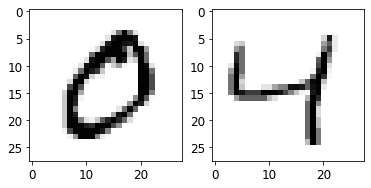

In [9]:
#check data in training set as visual:
print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[1].reshape(28, 28), cmap=plt.cm.Greys);
ax2.imshow(X_train[2].reshape(28, 28), cmap=plt.cm.Greys);

In [10]:
#define confusion matrix plot
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
plot_confusion_matrix

<function __main__.plot_confusion_matrix>

5 layers - 20 nodes / layer

In [11]:
#5 layers  with 20 Neurons each layer
%%time
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf_5a = tf.estimator.DNNClassifier(hidden_units=[20,20,20,20,20], n_classes=10,
                                     feature_columns=feature_cols)

input_fn_5a = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=50, batch_size=50, shuffle=True)
dnn_clf_5a.train(input_fn=input_fn_5a)

CPU times: user 2min 47s, sys: 5.46 s, total: 2min 53s
Wall time: 1min 55s


In [12]:
#5-20 evaluate training accuracy (5-20)
train_5a_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, shuffle=False)
eval_results_train_5a = dnn_clf_5a.evaluate(input_fn=train_5a_input_fn)
eval_results_train_5a


{'accuracy': 0.97485,
 'average_loss': 0.08164334,
 'global_step': 60000,
 'loss': 10.4447775}

In [13]:
#evaluate test accuracy (5-20)
test_5a_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results_test_5a = dnn_clf_5a.evaluate(input_fn=test_5a_input_fn)
eval_results_test_5a

{'accuracy': 0.9525,
 'average_loss': 0.17999187,
 'global_step': 60000,
 'loss': 22.783781}

In [15]:
#confusion matrix for 5-20 predictions
raw_predictions_5a = dnn_clf_5a.predict(input_fn=test_5a_input_fn)
predictions_5a = [p['class_ids'][0] for p in raw_predictions_5a]
confusion_matrix_5a = tf.confusion_matrix(y_test, predictions_5a)

with tf.Session():
    print('\nConfusion Matrix model 5a:\n', tf.Tensor.eval(confusion_matrix_5a,feed_dict=None, session=None))


Confusion Matrix model 5a:
 [[ 961    0    0    2    2    2    4    2    4    3]
 [   0 1114    4    2    0    2    4    3    6    0]
 [   7    2  976   14    5    0    7    8   12    1]
 [   1    1   16  947    1    9    1    6   24    4]
 [   3    0    3    1  946    0    7    5    1   16]
 [   4    0    3   13    1  830   11    3   22    5]
 [   9    3    2    0    8   12  916    0    8    0]
 [   2    8   14   10    4    1    0  972    4   13]
 [   7    1    3   14    7    8    3    3  925    3]
 [   6    7    1   10   26    5    1   10    5  938]]


[link text](https://)5 layers - 10 nodes / layer

In [20]:
#5 layers  with 10 Neurons each layer
%%time
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf_5b = tf.estimator.DNNClassifier(hidden_units=[10,10,10,10,10], n_classes=10,
                                     feature_columns=feature_cols)

input_fn_5b = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=50, batch_size=50, shuffle=True)
dnn_clf_5b.train(input_fn=input_fn_5b)

CPU times: user 2min 29s, sys: 6.58 s, total: 2min 36s
Wall time: 1min 35s


In [25]:
#5-10 evaluate training accuracy (5-10)
train_5b_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, shuffle=False)
eval_results_train_5b = dnn_clf_5b.evaluate(input_fn=train_5b_input_fn)
eval_results_train_5b

{'accuracy': 0.9263167,
 'average_loss': 0.25788268,
 'global_step': 60000,
 'loss': 32.99139}

In [27]:
#evaluate test accuracy (5-10)
test_5b_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results_test_5b = dnn_clf_5b.evaluate(input_fn=test_5b_input_fn)
eval_results_test_5b

{'accuracy': 0.9147,
 'average_loss': 0.31779307,
 'global_step': 60000,
 'loss': 40.22697}

In [28]:
#confusion matrix for 5-10 predictions
raw_predictions_5b = dnn_clf_5b.predict(input_fn=test_5b_input_fn)
predictions_5b = [p['class_ids'][0] for p in raw_predictions_5b]
confusion_matrix_5b = tf.confusion_matrix(y_test, predictions_5b)

with tf.Session():
    print('\nConfusion Matrix model 5b:\n', tf.Tensor.eval(confusion_matrix_5b,feed_dict=None, session=None))


Confusion Matrix model 5b:
 [[ 943    0    2    1    1    6   15    1    9    2]
 [   0 1098    3    9    1   10    1    2   10    1]
 [  10    8  910   27   11   10   12   10   32    2]
 [   3    7    8  914    1   32    0   13   22   10]
 [   0    1    3    0  920    0   15    2    6   35]
 [   8    6    3   47    4  778    6    1   25   14]
 [  17    1    9    0    8   24  893    0    6    0]
 [   0    4   17   12    8    1    1  933    6   46]
 [   7    0    6   23   20   39    7    8  837   27]
 [   3    3    0    4   37    6    1   17   17  921]]


2 Layers - 20 Nodes / Layer

In [29]:
#2 layers  with 20 Neurons each layer
%%time
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf_2a = tf.estimator.DNNClassifier(hidden_units=[20,20], n_classes=10,
                                     feature_columns=feature_cols)

input_fn_2a = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=50, batch_size=50, shuffle=True)
dnn_clf_2a.train(input_fn=input_fn_2a)

CPU times: user 2min 36s, sys: 5.79 s, total: 2min 41s
Wall time: 1min 46s


In [31]:
#2-20 evaluate training accuracy (2-20)
train_2a_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, shuffle=False)
eval_results_train_2a = dnn_clf_2a.evaluate(input_fn=train_2a_input_fn)
eval_results_train_2a

{'accuracy': 0.9819,
 'average_loss': 0.063739866,
 'global_step': 60000,
 'loss': 8.154353}

In [32]:
#evaluate test accuracy (2-20)
test_2a_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results_test_2a = dnn_clf_2a.evaluate(input_fn=test_2a_input_fn)
eval_results_test_2a

{'accuracy': 0.9567,
 'average_loss': 0.15889002,
 'global_step': 60000,
 'loss': 20.112661}

In [33]:
#confusion matrix for 2-20 predictions
raw_predictions_2a = dnn_clf_2a.predict(input_fn=test_2a_input_fn)
predictions_2a = [p['class_ids'][0] for p in raw_predictions_2a]
confusion_matrix_2a = tf.confusion_matrix(y_test, predictions_2a)

with tf.Session():
    print('\nConfusion Matrix model 2a:\n', tf.Tensor.eval(confusion_matrix_2a,feed_dict=None, session=None))


Confusion Matrix model 2a:
 [[ 960    1    5    1    2    2    4    4    1    0]
 [   0 1114    5    2    0    1    4    1    8    0]
 [   8    4  973   20    6    2    5    6    7    1]
 [   2    0   13  963    1   12    1    4   11    3]
 [   6    0    2    0  941    0   10    3    2   18]
 [   6    2    6   22    3  826    8    3   14    2]
 [   5    3    4    0    5    9  928    0    4    0]
 [   1    4   12    7    1    0    0  988    3   12]
 [   8    0    4   17    3   10    3    3  925    1]
 [   4    5    1    9   19    4    1    8    9  949]]


2 layers / 10 nodes

In [8]:
#2 layers  with 10 Neurons each layer
%%time
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf_2b = tf.estimator.DNNClassifier(hidden_units=[10,10], n_classes=10,
                                     feature_columns=feature_cols)

input_fn_2b = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=50, batch_size=50, shuffle=True)
dnn_clf_2b.train(input_fn=input_fn_2b)

CPU times: user 2min 22s, sys: 6.37 s, total: 2min 28s
Wall time: 1min 33s


In [10]:
#2-10 evaluate training accuracy (2-10)
train_2b_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, shuffle=False)
eval_results_train_2b = dnn_clf_2b.evaluate(input_fn=train_2b_input_fn)
eval_results_train_2b

{'accuracy': 0.90921664,
 'average_loss': 0.31891224,
 'global_step': 60000,
 'loss': 40.799007}

In [11]:
#evaluate test accuracy (2-10)
test_2b_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results_test_2b = dnn_clf_2b.evaluate(input_fn=test_2b_input_fn)
eval_results_test_2b

{'accuracy': 0.9016,
 'average_loss': 0.3435177,
 'global_step': 60000,
 'loss': 43.483253}

In [37]:
#confusion matrix for 2-10 predictions
raw_predictions_2b = dnn_clf_2b.predict(input_fn=test_2b_input_fn)
predictions_2b = [p['class_ids'][0] for p in raw_predictions_2b]
confusion_matrix_2b = tf.confusion_matrix(y_test, predictions_2b)

with tf.Session():
    print('\nConfusion Matrix model 2b:\n', tf.Tensor.eval(confusion_matrix_2b,feed_dict=None, session=None))


Confusion Matrix model 2b:
 [[ 960    1    5    1    2    2    4    4    1    0]
 [   0 1114    5    2    0    1    4    1    8    0]
 [   8    4  973   20    6    2    5    6    7    1]
 [   2    0   13  963    1   12    1    4   11    3]
 [   6    0    2    0  941    0   10    3    2   18]
 [   6    2    6   22    3  826    8    3   14    2]
 [   5    3    4    0    5    9  928    0    4    0]
 [   1    4   12    7    1    0    0  988    3   12]
 [   8    0    4   17    3   10    3    3  925    1]
 [   4    5    1    9   19    4    1    8    9  949]]
